In [4]:
import numpy as np
import torch
import cv2 as cv
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt
import pickle

In [34]:
class Sharp(nn.Module):
    def __init__(self):
        super(Sharp, self).__init__()
        self.flatten = nn.Flatten()
        self.encoder = nn.Sequential(
                nn.Linear(28*28, 128),
                nn.ReLU(),
                nn.Linear(128, 64),
                nn.ReLU(),
                nn.Linear(64, 36),
                nn.ReLU(),
                nn.Linear(36, 18),
                nn.ReLU(),
                nn.Linear(18, 9),
                )
        self.decoder = nn.Sequential(
                nn.Linear(9, 18),
                nn.ReLU(),
                nn.Linear(18, 36),
                nn.ReLU(),
                nn.Linear(36, 64),
                nn.ReLU(),
                nn.Linear(64, 128),
                nn.ReLU(),
                nn.Linear(128, 28*28),
                # nn.Sigmoid()
                )

    def forward(self, x):
        x = self.flatten(x)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded





In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"

train_dataset = datasets.MNIST(
        root="data",
        train=True,
        download=True,
        transform=ToTensor(),
)

test_dataset = datasets.MNIST(
        root="data",
        train=False,
        download=True,
        transform=ToTensor(),
)

train_dataloader = DataLoader(train_dataset, batch_size=64, pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, pin_memory=True)


In [37]:
model = Sharp().to(device)

learning_rate = 1e-3
batch_size = 64
epochs = 20

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
    weight_decay=1e-8
)

for i in range(epochs):
    losses = []
    print(f"Epoch {i+1}\n")

    for batch, (image, _) in enumerate(train_dataloader):
        flattened = torch.flatten(image, start_dim=1).to(device)
        pred = model(image.to(device))

        # plt.imshow(np.reshape(pred[0].cpu().detach().numpy(), (28, 28)))
        # plt.show()

        loss = loss_fn(pred, flattened)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss = loss.item()
            # plt.imshow(np.reshape(pred[2].cpu().detach().numpy(), (28, 28)))
            # plt.show()
            print(f"Loss {loss:>7f}")


torch.save(model.state_dict(), "model_final.pt")
print("done")

    

Epoch 1

Loss 0.111922
Loss 0.066366
Loss 0.056636
Loss 0.065829
Loss 0.058455
Loss 0.052827
Loss 0.045442
Loss 0.048756
Loss 0.050583
Loss 0.044223
Epoch 2

Loss 0.040811
Loss 0.042088
Loss 0.039356
Loss 0.041752
Loss 0.038526
Loss 0.036258
Loss 0.034558
Loss 0.035449
Loss 0.034542
Loss 0.034564
Epoch 3

Loss 0.032737
Loss 0.033756
Loss 0.032830
Loss 0.035932
Loss 0.035225
Loss 0.032760
Loss 0.031617
Loss 0.033386
Loss 0.032351
Loss 0.031994
Epoch 4

Loss 0.031372
Loss 0.031610
Loss 0.030776
Loss 0.034300
Loss 0.033631
Loss 0.031517
Loss 0.030201
Loss 0.032345
Loss 0.031918
Loss 0.030611
Epoch 5

Loss 0.029654
Loss 0.030340
Loss 0.029396
Loss 0.033030
Loss 0.032457
Loss 0.030728
Loss 0.028814
Loss 0.031569
Loss 0.031438
Loss 0.029833
Epoch 6

Loss 0.028528
Loss 0.029522
Loss 0.028525
Loss 0.032260
Loss 0.031947
Loss 0.030146
Loss 0.028207
Loss 0.030933
Loss 0.030850
Loss 0.029240
Epoch 7

Loss 0.028186
Loss 0.028794
Loss 0.027447
Loss 0.031382
Loss 0.031445
Loss 0.029310
Loss 0.027635

torch.Size([28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 784x128)

<Figure size 432x288 with 0 Axes>

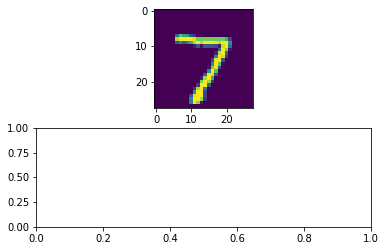

In [47]:
plt.figure()
for batch, (image, _) in enumerate(test_dataloader):
    f, ax = plt.subplots(2, 1)
    ax[0].imshow(image[0][0])
    pred = model(image[0][0].to(device))
    pred = np.reshape(pred, (28, 28))
    ax[1].imshow()
    plt.show()
    # flattened = torch.flatten(image[0])